# Qredo tokenomics simulation - protocol fees
### June 2023


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
forecast_length = 365*2
outfolder = os.path.realpath("../data/sim_data")

## 1. Load data

In [3]:
# load
df_file = os.path.join(outfolder, f"sample_by_scenario.pickle")
with open(df_file, "rb") as fp:
    df = pickle.load(fp)

# process columns
df["date"] = df["iteration"].apply(lambda x: dt.datetime(2023, 6, 15)+dt.timedelta(days=x)).values
df["burn_rate"] = (df["day_burn_fees"]/df["circ_supply"])/0.0001

# convert units
df["day_burn_fees"] = df["day_burn_fees"]/(10**3)

len(df)

14191200

In [4]:
combined_df = df[(df["staking_scenario"]==df["usage_scenario"]) & (df["staking_scenario"]==df["token_scenario"])]

## 2. Protocol fees by scenario

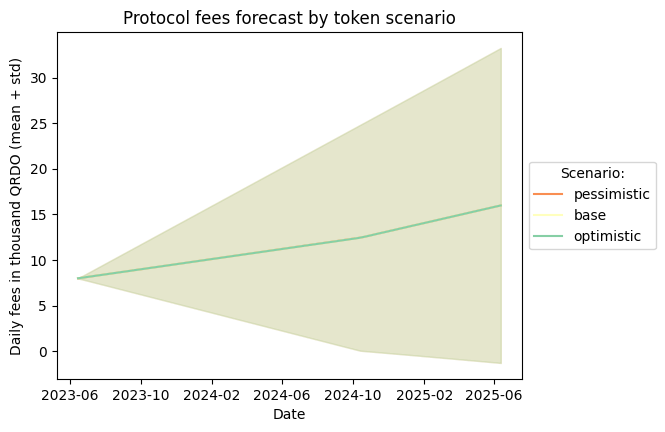

In [5]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="day_burn_fees", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.title("Protocol fees forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily fees in thousand QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

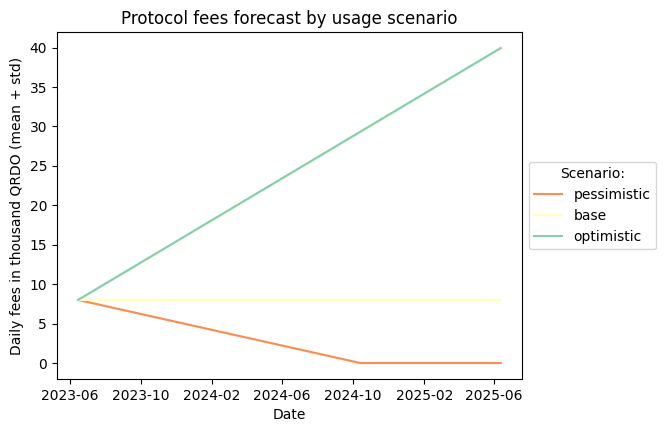

In [6]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="day_burn_fees", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.title("Protocol fees forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily fees in thousand QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

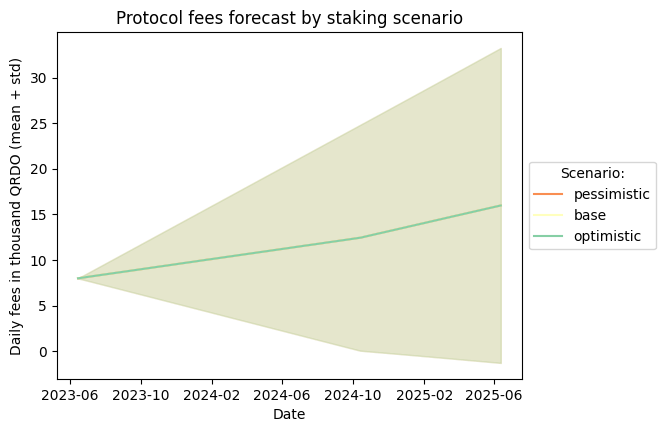

In [7]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="day_burn_fees", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.title("Protocol fees forecast by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily fees in thousand QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

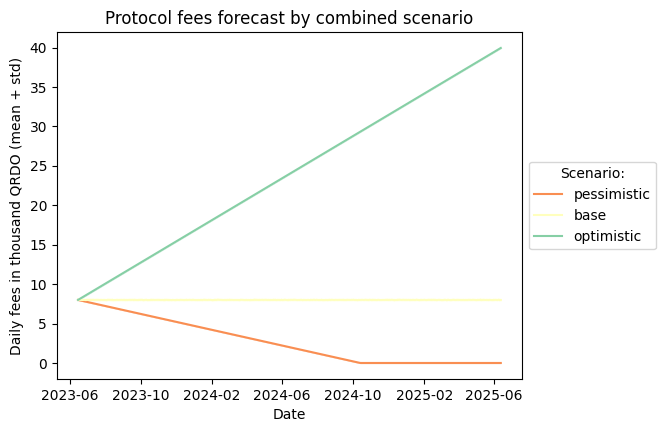

In [8]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="day_burn_fees", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.title("Protocol fees forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Daily fees in thousand QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

In [9]:
df[df["iteration"]==1].groupby("usage_scenario")["day_burn_fees"].mean()

usage_scenario
base           8.002029
optimistic     8.043000
pessimistic    7.983000
Name: day_burn_fees, dtype: float64

In [10]:
df[df["iteration"]==729].groupby("usage_scenario")["day_burn_fees"].mean()

usage_scenario
base            7.992544
optimistic     39.956000
pessimistic     0.000000
Name: day_burn_fees, dtype: float64

## 2. Burn rate by combined scenario

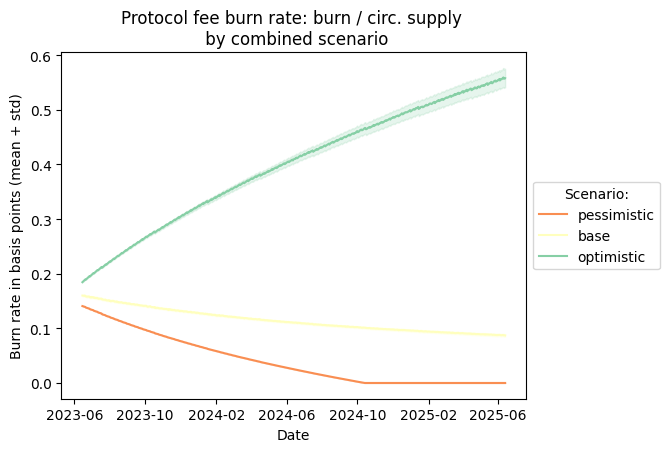

In [11]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="burn_rate", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.title("Protocol fee burn rate: burn / circ. supply \n by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Burn rate in basis points (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

In [12]:
df[df["iteration"]==1].groupby("usage_scenario")["burn_rate"].mean()

usage_scenario
base           0.159876
optimistic     0.177768
pessimistic    0.145524
Name: burn_rate, dtype: float64

In [13]:
df[df["iteration"]==729].groupby("usage_scenario")["burn_rate"].mean()

usage_scenario
base           0.100361
optimistic     0.546488
pessimistic    0.000000
Name: burn_rate, dtype: float64